<a href="https://colab.research.google.com/github/crdguez/mat4ac/blob/master/notebooks/est_evaluacion_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Si lo ejecutas desde google colab
from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive/Curso\ Actual/4ac/notebooks
!pwd
#os.chdir('/content/drive/Curso Actual')



ModuleNotFoundError: No module named 'google.colab'

In [1]:
# Importamos librerías
#from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd #this is how I usually import pandas
#import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline



import imgkit

# Función para analizar un dataframe

def analisis_df(df, txt_intro ="Tenemos los siguientes datos: \n " \
                ,txt_mejor="\n * Sube {}:", txt_peor="\n * **Baja** {}:", \
                txt_igual="\n * Se mantiene {}:", solo_diferencias=False, \
                modo=1) :
    # analiza los datos de un dataframe donde en el indice están las evaluaciones y en las columnas los items a analizar
    if max(df.index)  > 1 :
        ix = list(df.index).index(ultima_evaluacion)
        txt = txt_intro
        for c in range(len(df.columns)) :
            if (df.iloc[ix,c] - df.iloc[ix-1,c]) > 0 : txt2 = txt_mejor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df.iloc[ix-1,c]),str(df.iloc[ix,c]))
            elif (df.iloc[ix,c] - df.iloc[ix-1,c]) < 0 : txt2 = txt_peor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df.iloc[ix-1,c]),str(df.iloc[ix,c]))
            elif (solo_diferencias) : txt2=""
            else : txt2 = txt_igual.format(df[df.columns[c]].name)+" {}. ".format(str(df.iloc[ix,c]))              
            txt += txt2        
    else :
        txt = txt_intro
        if modo ==1 :
            txt += ", ".join(["**{}** es {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])
        elif modo == 2 :
            txt += " ".join(["\n* **{}**: {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])+" \n "
        else :
            txt += ", ".join(["**{}**: {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])+" \n "
    return txt+" \n ", [df[df.columns[i]] for i in range(len(df.columns))]
    


# Funciones para estilo

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: lightyellow'
    return 'color: %s ; font-size: 20px ; font-weight: bold' % color 

def color_media(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val < 5 or val =="") else 'black; background: burlywood'
    return 'color: %s ; font-size: 14px ; font-weight: bold'  % color 

def color_suspensos(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val > 0 or val =="") else 'black; background: darkkhaki'
        
    return 'color: %s ; font-weight: bold ; font-size: 14px' % color 

def evaluaciones_anteriores(val):      
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        #color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: ghostwhite'
        color = 'blue ; background: azure'
    
    return 'color: %s ; font-size: 12px ; font-weight: bold' % color 

In [2]:
# Importamos los datos

evaluaciones_a_incluir = 1

inicio_nombre_fichero = 'importado'

def actilla(fich='importado2', eval=2):
    fichero = fich + '.csv'
    pre_actilla = pd.read_csv(fichero, index_col=False)
    pre_actilla = pre_actilla.drop([col for col in pre_actilla if col.startswith('Unna')], axis=1)
    pre_actilla = pre_actilla.drop("Nº MNS", axis = 1)
    pre_actilla = pd.melt(pre_actilla, id_vars=["Nº","Apellidos, Nombre"], var_name="Asignatura", value_name="Nota")
    pre_actilla = pre_actilla[pre_actilla['Nota'].notna()]
    pre_actilla = pre_actilla.copy()
    pre_actilla['Eval'] = eval
    pre_actilla.Asignatura=pre_actilla.Asignatura.str.replace('\n', ' ')
    return pre_actilla
    

def concatenar_actillas(inicio_nombre_fichero='importado', evaluaciones_a_incluir=2): 
    return pd.concat([actilla(inicio_nombre_fichero + str(n + 1), n + 1) for n in range(evaluaciones_a_incluir)])

actilla_final = concatenar_actillas(inicio_nombre_fichero,evaluaciones_a_incluir)
actilla_final = actilla_final.rename(columns={'Apellidos, Nombre':'Alumno'})
actilla_final = actilla_final[['Alumno','Asignatura','Eval','Nota']]
actilla_final['Suspenso']=0

# Si sale algún no presentado hay que ejecutar lo siguiente
#actilla_final = actilla_final.drop(actilla_final[actilla_final.Nota == 'NP'].index)

actilla_final.Nota = pd.to_numeric(actilla_final.Nota)
actilla_final.loc[actilla_final['Nota'] < 5, 'Suspenso'] = 1
actilla_final.Nota = actilla_final.Nota.astype(int)

ultima_evaluacion = actilla_final.Eval.max()

actilla_final.to_csv('ev{}.csv'.format(evaluaciones_a_incluir),index=False)
actilla_final=actilla_final[actilla_final.Eval <= evaluaciones_a_incluir]
actilla_final

,Alumno,Asignatura,Eval,Nota,Suspenso
2,"Cabeza Roche, Andrea",ARE,1,8,0
3,"Campo García, Paula",ARE,1,8,0
21,"Pulido Ruiz, Nuria",ARE,1,8,0
22,"Raja Herranz, Laura",ARE,1,8,0
26,"Zueras Martínez, Marta",ARE,1,8,0
...,...,...,...,...,...
612,"Mateo Trejo, Ada",VET,1,8,0
613,"Morato Sánchez, Juan José",VET,1,7,0
616,"Raja Herranz, Laura",VET,1,8,0
619,"Villanueva Tejedor, Daniella",VET,1,9,0


In [3]:
###### Informe sábana (df5 y actilla_estilada)


#df = actilla_final[actilla_final.Eval <= ultima_evaluacion]
df = actilla_final[actilla_final.Eval.isin([ultima_evaluacion, ultima_evaluacion -1]) ]

df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval')
df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').rename(columns={'Nota':'NM'})
df3 = df.groupby(['Asignatura','Eval'])[['Nota']].mean()

df4 = pd.concat([df1,df3.T.rename(index={'Nota': 'Media'})])

# #calculamos el número de suspensos por asignatura y porcentaje

df7=df.groupby(['Asignatura','Eval'])[['Suspenso']].aggregate(['sum','count'])
df7[('Suspenso','porc')]=df7[('Suspenso','sum')]/df7[('Suspenso','count')]
df7.columns=df7.columns.get_level_values(1)
df7.T

df4 = pd.concat([df4,df7[['sum','porc']].T.rename(index={'sum':'nsusp','porc':'%'})], sort=False)

df5 = pd.concat([df4,df2], axis=1, sort=False)
df6 = actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Suspenso']].sum().unstack('Eval').rename(columns={'Suspenso':'MNS'})
df5 = pd.concat([df5,df6], axis=1, sort=False)


# # calculamos la media de las medias de las notas y la suma total de suspensos
df5.iloc[-3:-2,-2:-1]=df2.mean()[0]
df5.iloc[-2:-1,-1:]=df6.sum()[0]

# le damos estilo

actilla_estilada = df5.style.set_precision(0) \
    .format("{:.0%}",subset=(df5.index[-1:],df5.columns[:-2])) \
    .format("{:.0f}",subset=(df5.index[-2:-1],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index[-3:-2],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index,df5.columns[-2:-1])) \
    .format("{:.0f}",subset=(df5.index,df5.columns[-1:0])) \
    .set_table_styles([{'selector': 'td','props': [('border', '1px solid black'),('text-align', 'center')]}, \
                       {'selector': 'tr','props': [('border', '1px solid black')]}, \
                       {'selector': 'th','props': [('border', '1px solid black'),('text-align', 'center'),('font-size','13px')]}, \
                      ] \
                     ) \
    .applymap(color_negative_red, subset=(df5.index[:-3],df5.columns[:-2])).highlight_null("white") \
    .applymap(color_media, subset=(df5.index[-3:-2],df5.columns)) \
    .applymap(evaluaciones_anteriores, subset=(df5.index[-2:],df5.columns[:])) \
    .applymap(color_media, subset=(df5.index[:-3],['NM'])) \
    .applymap(color_suspensos, subset=(df5.index[:-3],['MNS'])) \
    .applymap(evaluaciones_anteriores, subset=(df5.index,df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \
    .set_na_rep('-')
df5

#                      {'selector': 'th','props': [('border', '1px solid black'),('text-align', 'center'),('font-size','20px')]}
 
#    .set_table_styles([{'selector': 'td','props': [('border-collapse', 'collapse'),('text-align', 'center')]}, \

#     .applymap(color_media, subset=(df5.index,['NM'])) \
#     .applymap(color_suspensos, subset=(df5.index,['MNS'])) \
#     .applymap(color_media, subset=(df5.index[-3:-2],df5.columns[:-2])) \
#     .applymap(color_suspensos, subset=(df5.index[-2:-2],df5.columns[:-2])) \
#     .applymap(evaluaciones_anteriores, subset=(df5.index[-3:],df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \



df5.head()

Asignatura,ARE,BG,CC,EC,ECB,EF,FIL,FQ,FQB,FR2,...,IN,INB,LE,MU,PL,RC,TIC,VET,NM,MNS
Eval,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"Aparicio Maella, Ángel",NaN,NaN,NaN,5.0,NaN,6.0,NaN,4.0,NaN,NaN,...,6.0,NaN,4.0,NaN,NaN,NaN,NaN,9.0,5.571429,2.0
"Arcas Sánchez, Daniel",NaN,NaN,NaN,5.0,NaN,7.0,NaN,3.0,NaN,NaN,...,3.0,NaN,3.0,NaN,NaN,NaN,NaN,8.0,4.428571,4.0
"Cabeza Roche, Andrea",8.0,9.0,NaN,NaN,NaN,8.0,NaN,NaN,6.0,7.0,...,NaN,7.0,7.0,NaN,NaN,NaN,NaN,8.0,7.111111,1.0
"Campo García, Paula",8.0,7.0,NaN,NaN,NaN,8.0,NaN,NaN,8.0,8.0,...,NaN,8.0,8.0,NaN,NaN,NaN,NaN,8.0,7.888889,0.0
"Damasceno Ossó, Óscar",NaN,NaN,NaN,8.0,NaN,5.0,NaN,6.0,NaN,NaN,...,6.0,NaN,6.0,NaN,7.0,6.0,NaN,NaN,6.250000,0.0


In [4]:
# actilla estilada a fichero html
html='<meta charset="UTF-8">'+actilla_estilada.render()
f=open('actilla_{}ªev.html'.format(ultima_evaluacion),'w')
f.write(html)
f.close()

# actilla estilada a imagen

imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}ev.svg'.format(ultima_evaluacion), options = {'format':'svg','zoom':'0.4'})
imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}ev.png'.format(ultima_evaluacion), options = {'format':'png','zoom':'0.8'})

actilla_estilada

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


Asignatura,ARE,BG,CC,EC,ECB,EF,FIL,FQ,FQB,FR2,GH,GHB,IN,INB,LE,MU,PL,RC,TIC,VET,NM,MNS
Eval,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aparicio Maella, Ángel",-,-,-,5,-,6,-,4,-,-,5,-,6,-,4,-,-,-,-,9,5.6,2
"Arcas Sánchez, Daniel",-,-,-,5,-,7,-,3,-,-,2,-,3,-,3,-,-,-,-,8,4.4,4
"Cabeza Roche, Andrea",8,9,-,-,-,8,-,-,6,7,-,4,-,7,7,-,-,-,-,8,7.1,1
"Campo García, Paula",8,7,-,-,-,8,-,-,8,8,-,8,-,8,8,-,-,-,-,8,7.9,0
"Damasceno Ossó, Óscar",-,-,-,8,-,5,-,6,-,-,6,-,6,-,6,-,7,6,-,-,6.2,0
"Doncheva Mavrova, Teodora",-,7,8,-,-,7,-,-,8,-,-,4,-,9,6,9,-,-,-,8,7.3,1
"Escanero Agustín, Sergio",-,-,-,-,-,7,-,-,6,-,-,4,-,6,4,8,-,8,-,-,6.1,2
"Espinosa Pérez, David",-,-,-,-,9,8,-,5,-,-,-,5,-,7,5,-,-,-,-,8,6.7,0
"Esteban Muñoz, Cora",-,-,-,-,6,6,-,7,-,-,-,7,-,8,7,-,-,-,-,8,7.0,0


In [5]:
au = "IES Pedro Cerrada"
da = "4ºESO B"
f = open("acta_{}ev.md".format(ultima_evaluacion), "w")
texto = """---
title: "Acta de la {}ª evaluación" 
author: {}
date: {}
titlepage: true
logo: headerright
geometry: landscape,margin=1in
keywords: [Acta]
... \n""".format(ultima_evaluacion, au, da)

texto += "# Acta de la {}ª evaluación \n\n \\newpage![](actilla_{}ev.png) \n\n## Resultados generales: \n".format(ultima_evaluacion, ultima_evaluacion)

f2 = open("resumen_{}ev.md".format(ultima_evaluacion), "w")
texto2 = """---
title: "Estadísticas {}ªev." 
author: {}
date: {}
titlepage: true
logo: headerright
geometry: margin=1in, landscape
keywords: [Resumen]
...\n""".format(ultima_evaluacion, au, da)

In [6]:
df = actilla_final.groupby(['Eval'])[['Alumno','Nota','Suspenso']].aggregate({'Alumno':'nunique','Nota':'mean','Suspenso':'sum'}).rename(columns={'Alumno':'N_al', 'Nota':'Media', 'Suspenso':'N_susp'})
df['Susp_alu']=(df['N_susp']/df['N_al']).round(2)
df['Media']=df['Media'].round(2)
display(df)

df2 = df.rename(columns={'N_al':'número de alumnos', 'Media':'nota media', 'N_susp':'número de suspensos','Susp_alu':'número de suspensos por alumno'}).iloc[:,1:]
display(df2)

#texto += "\n\n### Resumen \n"
#texto += "\n  {}  \n".format(df.to_markdown())
texto += analisis_df(df2, txt_intro ="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0] 
texto2 += analisis_df(df2, txt_intro ="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0] 

analisis_df(df2,txt_intro="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0]

#analisis_df??

,N_al,Media,N_susp,Susp_alu
Eval,,,,
1,27,7.48,13,0.48


,nota media,número de suspensos,número de suspensos por alumno
Eval,,,
1,7.48,13,0.48


'A nivel de grupo, se tienen los siguientes datos: \n \n* **nota media**: 7.48 \n* **número de suspensos**: 13 \n* **número de suspensos por alumno**: 0.48 \n  \n '

''

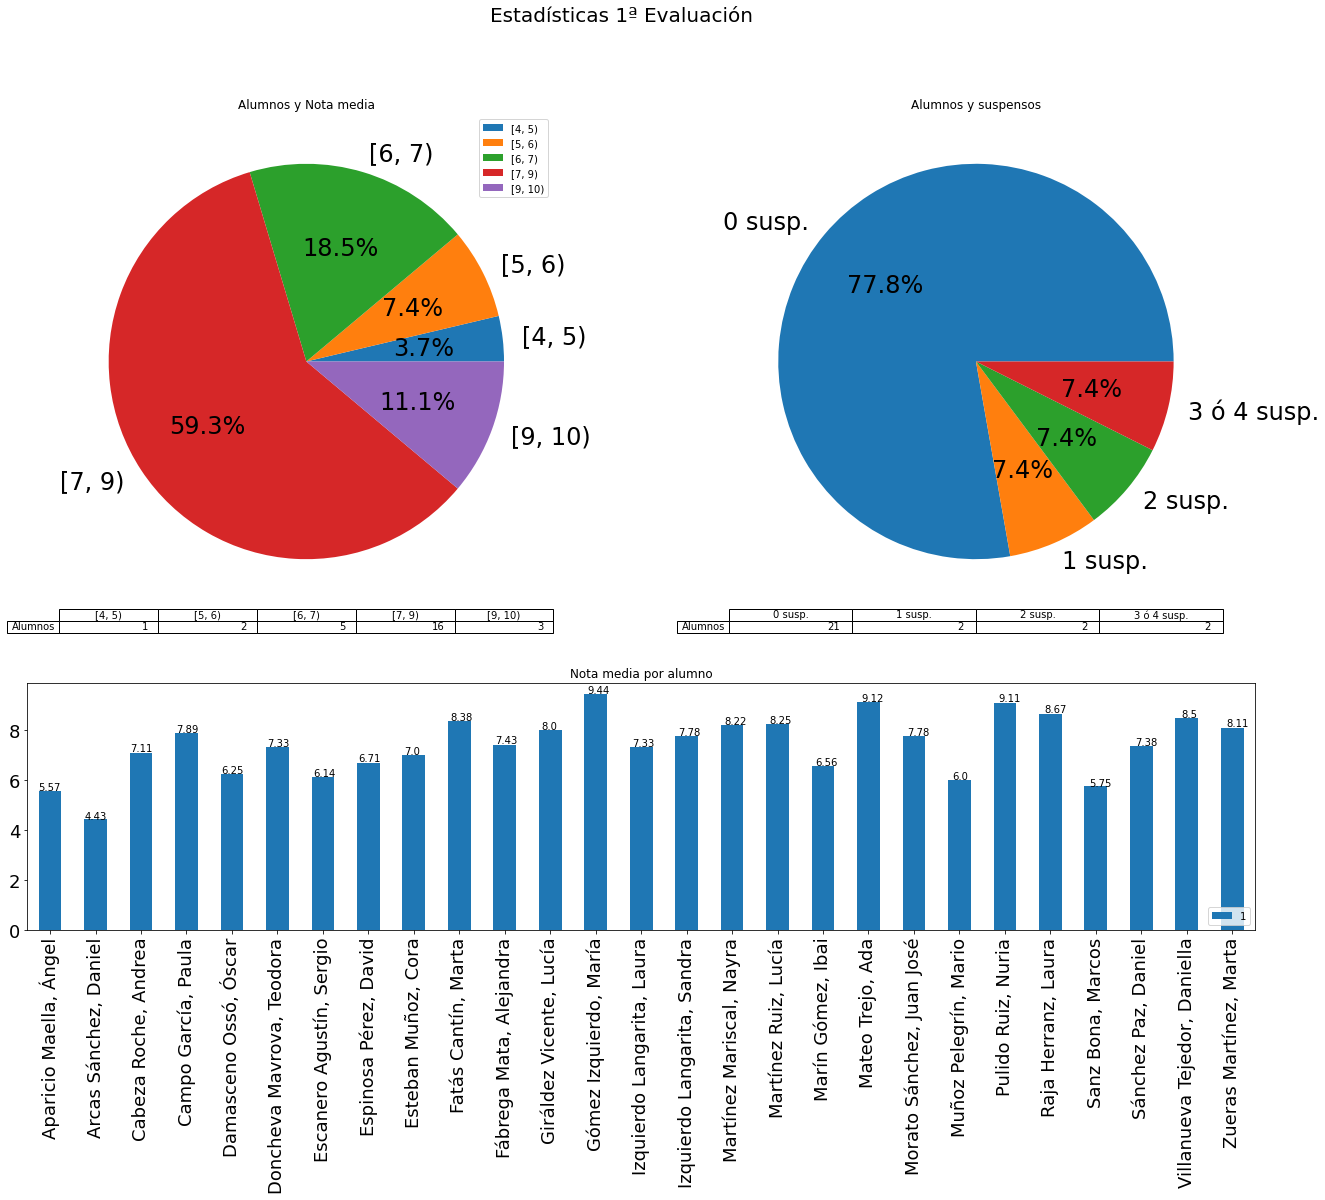

In [7]:
fig = plt.figure(figsize=(22,15))
fig.suptitle('Estadísticas {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[2, 1])

ax0 = fig.add_subplot(gs[1, :])
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g3=df.plot.bar(title='Nota media por alumno',ax=ax0, xlabel="", fontsize=18)
g3.legend(loc='lower right')
for p in g3.patches:
    g3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
ax1 = fig.add_subplot(gs[0, 0])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = 'Alumnos'
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ax=ax1, ylabel="", fontsize=24)
, fontsize=24
ax2 = fig.add_subplot(gs[0, 1])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'
g4=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True, ax=ax2, ylabel="", fontsize=24)

fig.savefig('resumen_{}ev.png'.format(ultima_evaluacion))

# Finalizamos informe resumen
#imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}.png'.format(ultima_evaluacion), options = {'format':'png','zoom':'1.2'})


#texto += "# Resultados de la {}ª evaluación \n\n".format(ultima_evaluacion)
texto2 += "![](actilla_{}ev.png)".format(ultima_evaluacion)
texto2 += "\\newpage"
texto2 += "\n \n ![](resumen_{}ev.png)".format(ultima_evaluacion)+" \n \n"
f2.write(texto2)
f2.close()

import pypandoc

pypandoc.convert_file("resumen_{}ev.md".format(ultima_evaluacion),'pdf',outputfile='resumen_{}ev.pdf'.format(ultima_evaluacion),extra_args=['--template=borrar.latex'])


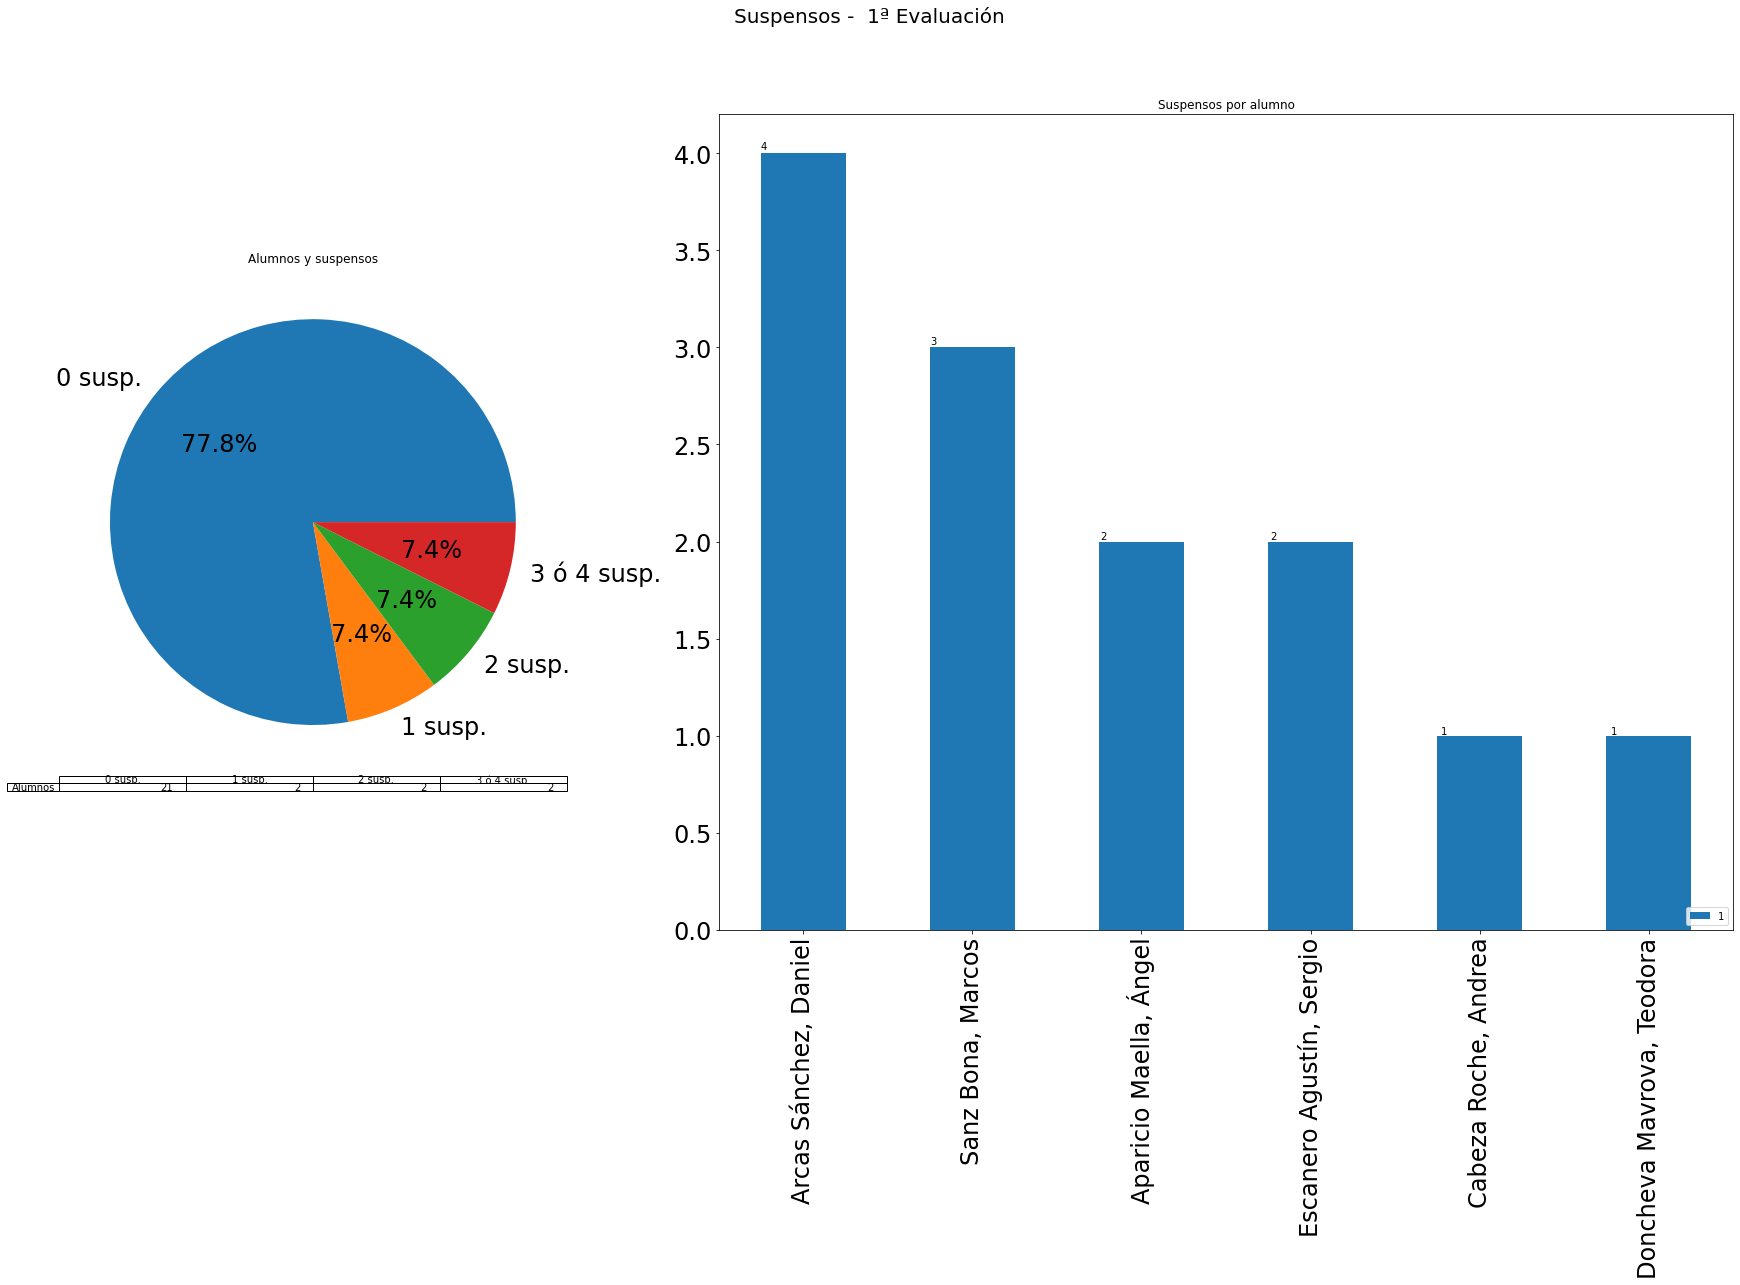

In [8]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Suspensos -  {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax0 = fig.add_subplot(gs[0, 0])

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'

g0=df2[df2>0].plot(kind='pie', title = 'Alumnos y suspensos',ax=ax0, autopct='%1.1f%%', table=True, ylabel="", fontsize=24)

ax1 = fig.add_subplot(gs[0, 1])

df=actilla_final.groupby(['Alumno','Eval'])[['Suspenso']].sum().round(2).rename(columns={'Suspenso':'Suspensos'}).unstack()
df.columns = df.columns.get_level_values(1)
g4=df[df[ultima_evaluacion] > 0].sort_values(ultima_evaluacion, ascending=False).plot.bar(title='Suspensos por alumno',ax=ax1, xlabel="", fontsize=24)
#g4=df.plot.bar(title='Suspensos por alumno', xlabel="", fontsize=18)
for p in g4.patches:
    g4.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
g4.legend(loc='lower right')    

fig.savefig('g3.png'.format(ultima_evaluacion))

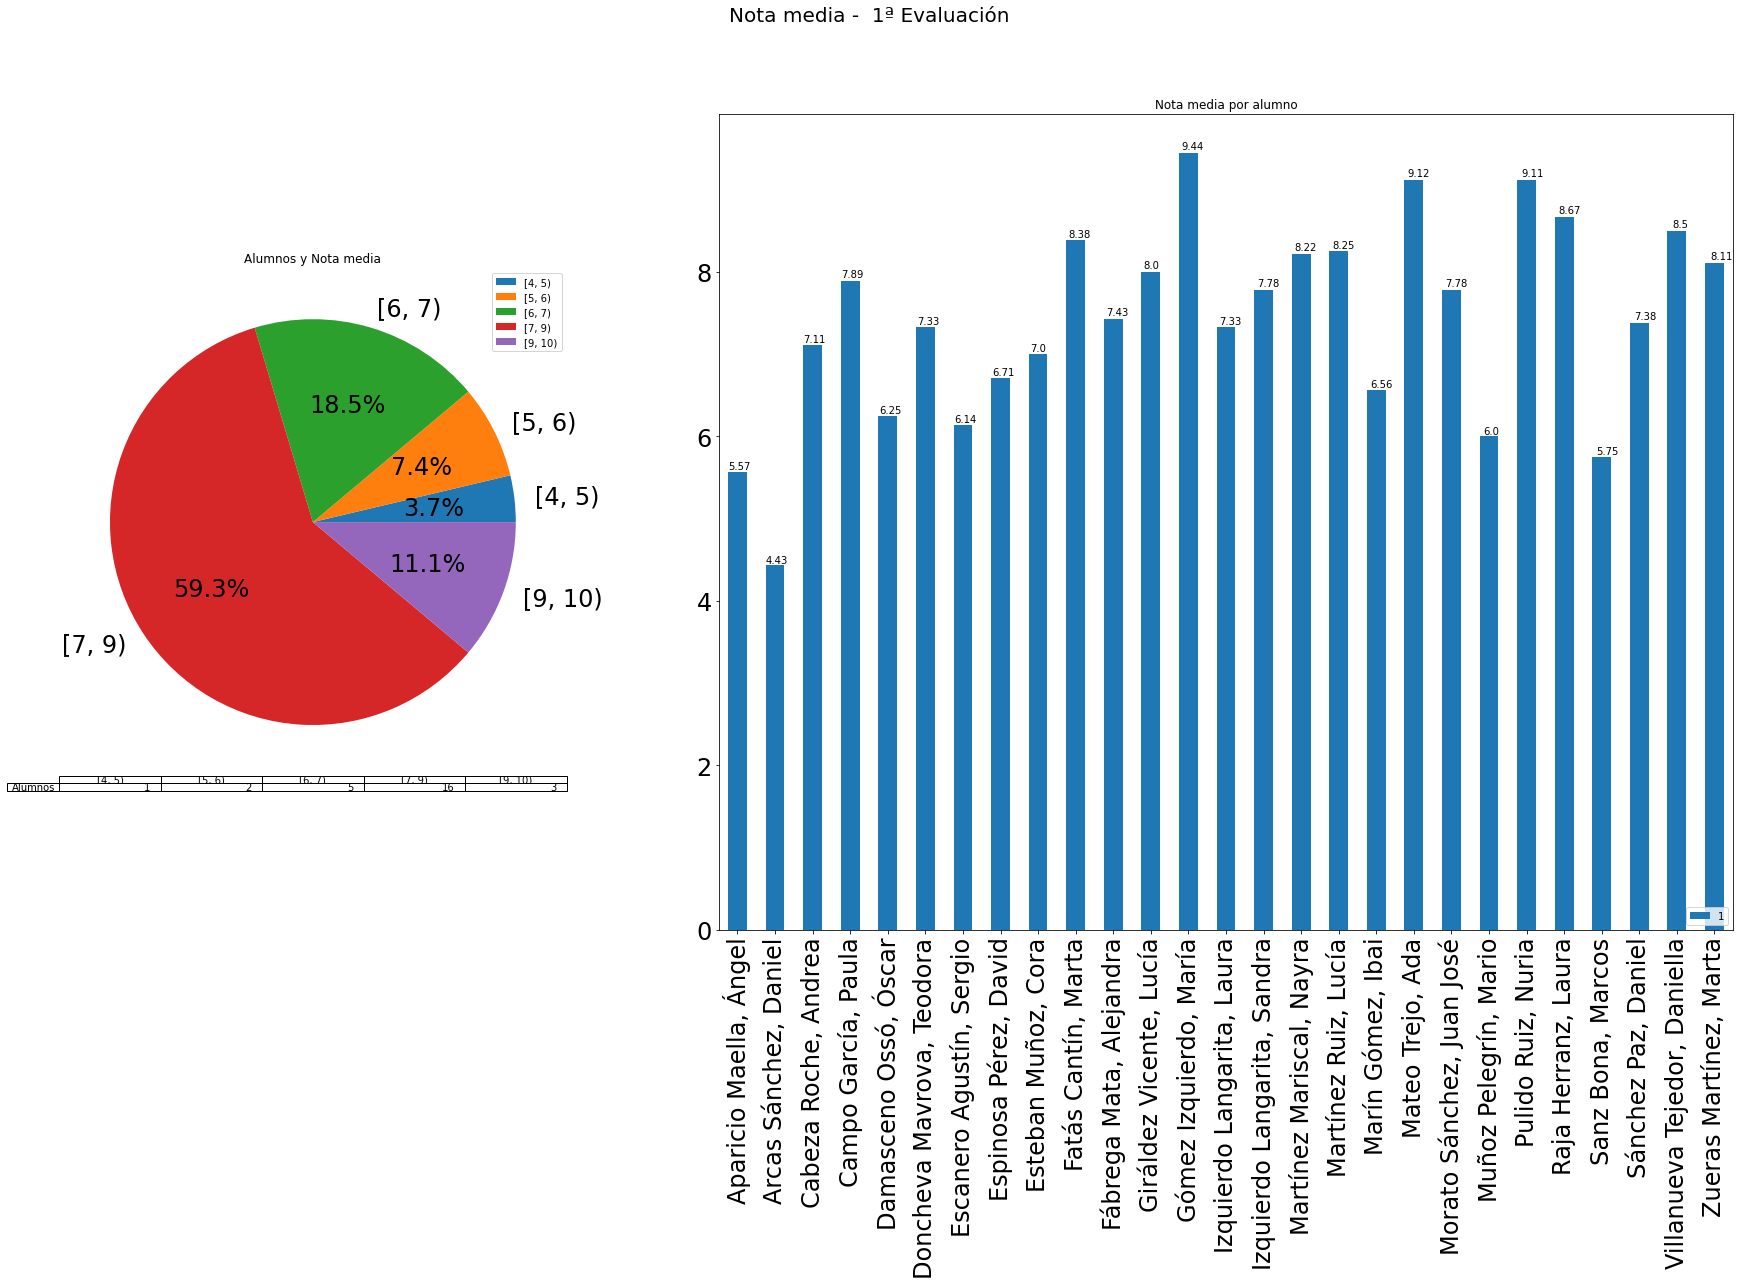

In [9]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Nota media -  {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax0 = fig.add_subplot(gs[0, 0])

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = "Alumnos"
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ylabel="", fontsize=24)

ax0 = fig.add_subplot(gs[0,1])
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g3=df.plot.bar(title='Nota media por alumno',ax=ax0, xlabel="", fontsize=24)
g3.legend(loc='lower right')
for p in g3.patches:
    g3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
   

fig.savefig('g4.png'.format(ultima_evaluacion))

,0 susp.,1 susp.,2 susp.,3 ó 4 susp.,> 4 susp.
Alumnos,21,2,2,2,0


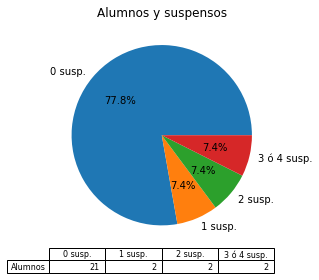

In [10]:
# Alumnos y suspensos

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']

df2.name = 'Alumnos'
#df2.name = ultima_evaluacion

g0=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True, ylabel="")
g0
g0.get_figure().savefig('g0.png')

# texto += "\n\n### Resumen de suspensos \n"
# texto += "\n \n {} \n".format(df2.to_frame().T.to_markdown())

texto +=analisis_df(df2.to_frame().T.rename({'Alumnos':ultima_evaluacion}),txt_intro="El número de alumnos por suspensos se distribuyen de la siguiente manera: \n", modo=2)[0]
texto += "\n \n Gráficamente: \n \n ![](g3.png) \n \n"

df2.to_frame().T



In [11]:
# Alumno-Asignatura-Suspenso
df = actilla_final[(actilla_final.Eval == ultima_evaluacion) & (actilla_final.Suspenso >= 0)][['Alumno','Asignatura','Suspenso']]

# Alumno-Suspenso
df2=df.groupby('Alumno').sum().sort_values('Suspenso', ascending=False)

# Numero Suspenso - Numero alumnos
df3 = df2
df3['N']=1
df3 = df3.groupby('Suspenso').count().sort_index(ascending=False)

display("Alumnos suspensos: \n")

texto += " \n Alumnos con suspensos: \n"
for i in df3[df3.index> 0].index :
    print(f'Con **{i}** asignatura:')
    texto += "\n* Con **{}** asignaturas: \n".format(i)
    for j in df2[df2.Suspenso == i].sort_values('Alumno').index : 
        print(" ", j,'(', ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values),')')
        texto += "\n    - "+ j+' ('+ ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values)+") \n \n"


'Alumnos suspensos: \n'

Con **4** asignatura:
  Arcas Sánchez, Daniel ( FQ, GH, IN, LE )
Con **3** asignatura:
  Sanz Bona, Marcos ( BG, FQ, LE )
Con **2** asignatura:
  Aparicio Maella, Ángel ( FQ, LE )
  Escanero Agustín, Sergio ( GHB, LE )
Con **1** asignatura:
  Cabeza Roche, Andrea ( GHB )
  Doncheva Mavrova, Teodora ( GHB )


Nota,"[0, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 7)","[7, 9)","[9, 10)"
Alumnos,0,0,1,2,5,16,3


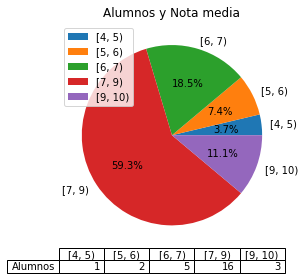

In [12]:
# Alumnos y nota media
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = "Alumnos"
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ylabel="")
g1
g1.get_figure().savefig('g1.png')

# texto += "\n\n### Resumen de nota media \n"
# texto += "\n {} \n".format(df2.to_frame().T.to_markdown())

texto +=analisis_df(df2.to_frame().T.rename({'Alumnos':ultima_evaluacion}),txt_intro="El número de alumnos por nota media se distribuye de la siguiente manera: \n", modo=2)[0]
texto += "\n\n Gráficamente \n \n ![](g4.png) \n \n"

df2.to_frame().T



Eval,1
Alumno,
"Aparicio Maella, Ángel",5.57
"Arcas Sánchez, Daniel",4.43
"Cabeza Roche, Andrea",7.11
"Campo García, Paula",7.89
"Damasceno Ossó, Óscar",6.25
"Doncheva Mavrova, Teodora",7.33
"Escanero Agustín, Sergio",6.14
"Espinosa Pérez, David",6.71
"Esteban Muñoz, Cora",7.00


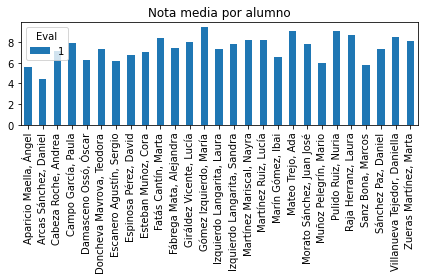

In [13]:
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g2=df.plot.bar(title='Nota media por alumno', xlabel ="") 
g2
g2.get_figure().savefig('g2.png')

texto += "\n\n## Resultados por alumno \n\n"
# texto += "\n\n### Notas medias \n\n"
# texto += " {} ".format(df.to_markdown())
# texto += "\n\n ![](g2.png) \n \n"

df

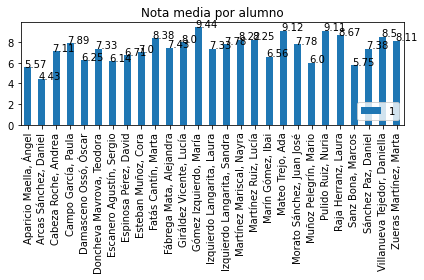

In [14]:
g2 = df.plot(kind='bar', title='Nota media por alumno', xlabel ="")
g2.legend(loc='lower right')

for p in g2.patches:
    g2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

g2.get_figure().savefig('g2.png')

In [15]:
# Resultados por alumno
df = actilla_final[actilla_final.Eval <= ultima_evaluacion]

#texto += "\n\n### Resultados por alumno \n"
for a in df.groupby('Alumno').nunique().index :
    
    #Resumen de resultados
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].groupby(['Alumno','Eval']).aggregate({'Nota':'mean','Suspenso':'sum'})
    df2.index = df2.index.get_level_values(1)
    df2.Nota = df2.Nota.round(2)
    df2 = df2.rename(columns={'Nota':'Nota media', 'Suspenso':'Número de suspensos'})
    display(analisis_df(df2, "En la {}ªev: \n ".format(ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    texto += "\n\n### {} \n".format(a)
    #texto += "\n {} \n".format(analisis_df(df2, " {} en la {}ªev: \n ".format(a,ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    texto += "\n * {}".format(analisis_df(df2, "",txt_igual="\n * Mantiene {}", modo=3)[0])

    #Lista de suspensos
    df2 = df[(df.Alumno==a) & (df.Suspenso==1) & (df.Eval == ultima_evaluacion)][['Asignatura','Eval','Suspenso']]
    if len(df2[['Asignatura']].values) > 0 : 
        #txt="* Suspende {} asignaturas: ".format(len(df2[['Asignatura']].values)) + ", ".join([i[0] for i in df2[['Asignatura']].values])
        txt="* Suspensos: " + ", ".join([i[0] for i in df2[['Asignatura']].values])
        texto += "\n\n{} \n".format(txt)
        print(txt) 

    
    #Análisis de las notas
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].iloc[:,1:-1].groupby(['Asignatura','Eval']).min().unstack('Asignatura')
    df2.columns = df2.columns.get_level_values(1)
    display(df2)
    display(analisis_df(df2, "En concreto: \n ", "Sube en {}:", "Baja en {}:", "En {}:", solo_diferencias=True)[0])
    texto += "\n{}\n".format(df2.to_markdown())
    texto +=  analisis_df(df2, "\n\n * En concreto: ", "Sube en {}:", "**Baja** en {}:", "En {}:", solo_diferencias=True, modo=3)[0]

texto = texto.replace('|--','|:-').replace('--|','-:|')
f.write(texto)
f.close()


pypandoc.convert_file("acta_{}ev.md".format(ultima_evaluacion),'pdf',outputfile='acta_{}ev.pdf'.format(ultima_evaluacion),extra_args=['--template=borrar.latex'])
pypandoc.convert_file("acta_{}ev.md".format(ultima_evaluacion),'docx',outputfile='acta_{}ev.docx'.format(ultima_evaluacion))

'En la 1ªev: \n **Nota media** es 5.57, **Número de suspensos** es 2 \n '

* Suspensos: FQ, LE


Asignatura,EC,EF,FQ,GH,IN,LE,VET
Eval,,,,,,,
1,5,6,4,5,6,4,9


'En concreto: \n **EC** es 5, **EF** es 6, **FQ** es 4, **GH** es 5, **IN** es 6, **LE** es 4, **VET** es 9 \n '

'En la 1ªev: \n **Nota media** es 4.43, **Número de suspensos** es 4 \n '

* Suspensos: FQ, GH, IN, LE


Asignatura,EC,EF,FQ,GH,IN,LE,VET
Eval,,,,,,,
1,5,7,3,2,3,3,8


'En concreto: \n **EC** es 5, **EF** es 7, **FQ** es 3, **GH** es 2, **IN** es 3, **LE** es 3, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 7.11, **Número de suspensos** es 1 \n '

* Suspensos: GHB


Asignatura,ARE,BG,EF,FQB,FR2,GHB,INB,LE,VET
Eval,,,,,,,,,
1,8,9,8,6,7,4,7,7,8


'En concreto: \n **ARE** es 8, **BG** es 9, **EF** es 8, **FQB** es 6, **FR2** es 7, **GHB** es 4, **INB** es 7, **LE** es 7, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 7.89, **Número de suspensos** es 0 \n '

Asignatura,ARE,BG,EF,FQB,FR2,GHB,INB,LE,VET
Eval,,,,,,,,,
1,8,7,8,8,8,8,8,8,8


'En concreto: \n **ARE** es 8, **BG** es 7, **EF** es 8, **FQB** es 8, **FR2** es 8, **GHB** es 8, **INB** es 8, **LE** es 8, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 6.25, **Número de suspensos** es 0 \n '

Asignatura,EC,EF,FQ,GH,IN,LE,PL,RC
Eval,,,,,,,,
1,8,5,6,6,6,6,7,6


'En concreto: \n **EC** es 8, **EF** es 5, **FQ** es 6, **GH** es 6, **IN** es 6, **LE** es 6, **PL** es 7, **RC** es 6 \n '

'En la 1ªev: \n **Nota media** es 7.33, **Número de suspensos** es 1 \n '

* Suspensos: GHB


Asignatura,BG,CC,EF,FQB,GHB,INB,LE,MU,VET
Eval,,,,,,,,,
1,7,8,7,8,4,9,6,9,8


'En concreto: \n **BG** es 7, **CC** es 8, **EF** es 7, **FQB** es 8, **GHB** es 4, **INB** es 9, **LE** es 6, **MU** es 9, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 6.14, **Número de suspensos** es 2 \n '

* Suspensos: GHB, LE


Asignatura,EF,FQB,GHB,INB,LE,MU,RC
Eval,,,,,,,
1,7,6,4,6,4,8,8


'En concreto: \n **EF** es 7, **FQB** es 6, **GHB** es 4, **INB** es 6, **LE** es 4, **MU** es 8, **RC** es 8 \n '

'En la 1ªev: \n **Nota media** es 6.71, **Número de suspensos** es 0 \n '

Asignatura,ECB,EF,FQ,GHB,INB,LE,VET
Eval,,,,,,,
1,9,8,5,5,7,5,8


'En concreto: \n **ECB** es 9, **EF** es 8, **FQ** es 5, **GHB** es 5, **INB** es 7, **LE** es 5, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 7, **Número de suspensos** es 0 \n '

Asignatura,ECB,EF,FQ,GHB,INB,LE,VET
Eval,,,,,,,
1,6,6,7,7,8,7,8


'En concreto: \n **ECB** es 6, **EF** es 6, **FQ** es 7, **GHB** es 7, **INB** es 8, **LE** es 7, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 8.38, **Número de suspensos** es 0 \n '

Asignatura,BG,EF,FQB,FR2,GHB,INB,LE,RC
Eval,,,,,,,,
1,9,9,8,9,8,8,8,8


'En concreto: \n **BG** es 9, **EF** es 9, **FQB** es 8, **FR2** es 9, **GHB** es 8, **INB** es 8, **LE** es 8, **RC** es 8 \n '

'En la 1ªev: \n **Nota media** es 7.43, **Número de suspensos** es 0 \n '

Asignatura,BG,EF,FQB,GHB,INB,LE,RC
Eval,,,,,,,
1,7,8,7,7,8,7,8


'En concreto: \n **BG** es 7, **EF** es 8, **FQB** es 7, **GHB** es 7, **INB** es 8, **LE** es 7, **RC** es 8 \n '

'En la 1ªev: \n **Nota media** es 8, **Número de suspensos** es 0 \n '

Asignatura,BG,EF,FQB,FR2,GHB,INB,LE,RC
Eval,,,,,,,,
1,7,8,8,9,9,7,7,9


'En concreto: \n **BG** es 7, **EF** es 8, **FQB** es 8, **FR2** es 9, **GHB** es 9, **INB** es 7, **LE** es 7, **RC** es 9 \n '

'En la 1ªev: \n **Nota media** es 9.44, **Número de suspensos** es 0 \n '

Asignatura,BG,EF,FIL,FQB,FR2,GHB,INB,LE,RC
Eval,,,,,,,,,
1,10,9,10,10,9,10,9,9,9


'En concreto: \n **BG** es 10, **EF** es 9, **FIL** es 10, **FQB** es 10, **FR2** es 9, **GHB** es 10, **INB** es 9, **LE** es 9, **RC** es 9 \n '

'En la 1ªev: \n **Nota media** es 7.33, **Número de suspensos** es 0 \n '

Asignatura,BG,CC,EF,FQB,FR2,GHB,INB,LE,RC
Eval,,,,,,,,,
1,7,9,6,7,7,8,8,7,7


'En concreto: \n **BG** es 7, **CC** es 9, **EF** es 6, **FQB** es 7, **FR2** es 7, **GHB** es 8, **INB** es 8, **LE** es 7, **RC** es 7 \n '

'En la 1ªev: \n **Nota media** es 7.78, **Número de suspensos** es 0 \n '

Asignatura,BG,CC,EF,FQB,FR2,GHB,INB,LE,RC
Eval,,,,,,,,,
1,7,9,9,7,8,7,8,7,8


'En concreto: \n **BG** es 7, **CC** es 9, **EF** es 9, **FQB** es 7, **FR2** es 8, **GHB** es 7, **INB** es 8, **LE** es 7, **RC** es 8 \n '

'En la 1ªev: \n **Nota media** es 8.22, **Número de suspensos** es 0 \n '

Asignatura,BG,EF,FQB,FR2,GHB,INB,LE,TIC,VET
Eval,,,,,,,,,
1,8,7,9,9,8,7,9,8,9


'En concreto: \n **BG** es 8, **EF** es 7, **FQB** es 9, **FR2** es 9, **GHB** es 8, **INB** es 7, **LE** es 9, **TIC** es 8, **VET** es 9 \n '

'En la 1ªev: \n **Nota media** es 8.25, **Número de suspensos** es 0 \n '

Asignatura,ECB,EF,FQ,GHB,INB,LE,TIC,VET
Eval,,,,,,,,
1,9,9,7,6,8,9,9,9


'En concreto: \n **ECB** es 9, **EF** es 9, **FQ** es 7, **GHB** es 6, **INB** es 8, **LE** es 9, **TIC** es 9, **VET** es 9 \n '

'En la 1ªev: \n **Nota media** es 6.56, **Número de suspensos** es 0 \n '

Asignatura,EC,EF,FIL,FQ,GH,IN,LE,MU,RC
Eval,,,,,,,,,
1,7,6,6,5,7,6,7,8,7


'En concreto: \n **EC** es 7, **EF** es 6, **FIL** es 6, **FQ** es 5, **GH** es 7, **IN** es 6, **LE** es 7, **MU** es 8, **RC** es 7 \n '

'En la 1ªev: \n **Nota media** es 9.12, **Número de suspensos** es 0 \n '

Asignatura,BG,EF,FQB,GHB,INB,LE,TIC,VET
Eval,,,,,,,,
1,9,9,9,10,9,9,10,8


'En concreto: \n **BG** es 9, **EF** es 9, **FQB** es 9, **GHB** es 10, **INB** es 9, **LE** es 9, **TIC** es 10, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 7.78, **Número de suspensos** es 0 \n '

Asignatura,ECB,EF,FQ,FR2,GHB,INB,LE,TIC,VET
Eval,,,,,,,,,
1,9,9,7,7,7,9,6,9,7


'En concreto: \n **ECB** es 9, **EF** es 9, **FQ** es 7, **FR2** es 7, **GHB** es 7, **INB** es 9, **LE** es 6, **TIC** es 9, **VET** es 7 \n '

'En la 1ªev: \n **Nota media** es 6, **Número de suspensos** es 0 \n '

Asignatura,EC,EF,FQ,GH,IN,LE,RC,TIC
Eval,,,,,,,,
1,7,6,5,5,5,6,7,7


'En concreto: \n **EC** es 7, **EF** es 6, **FQ** es 5, **GH** es 5, **IN** es 5, **LE** es 6, **RC** es 7, **TIC** es 7 \n '

'En la 1ªev: \n **Nota media** es 9.11, **Número de suspensos** es 0 \n '

Asignatura,ARE,ECB,EF,FQ,FR2,GHB,INB,LE,RC
Eval,,,,,,,,,
1,8,9,9,9,10,10,9,10,8


'En concreto: \n **ARE** es 8, **ECB** es 9, **EF** es 9, **FQ** es 9, **FR2** es 10, **GHB** es 10, **INB** es 9, **LE** es 10, **RC** es 8 \n '

'En la 1ªev: \n **Nota media** es 8.67, **Número de suspensos** es 0 \n '

Asignatura,ARE,BG,EF,FQB,FR2,GHB,INB,LE,VET
Eval,,,,,,,,,
1,8,9,7,10,9,9,9,9,8


'En concreto: \n **ARE** es 8, **BG** es 9, **EF** es 7, **FQB** es 10, **FR2** es 9, **GHB** es 9, **INB** es 9, **LE** es 9, **VET** es 8 \n '

'En la 1ªev: \n **Nota media** es 5.75, **Número de suspensos** es 3 \n '

* Suspensos: BG, FQ, LE


Asignatura,BG,CC,EF,FQ,GH,IN,LE,RC
Eval,,,,,,,,
1,4,7,7,4,6,8,4,6


'En concreto: \n **BG** es 4, **CC** es 7, **EF** es 7, **FQ** es 4, **GH** es 6, **IN** es 8, **LE** es 4, **RC** es 6 \n '

'En la 1ªev: \n **Nota media** es 7.38, **Número de suspensos** es 0 \n '

Asignatura,EC,EF,FQ,GH,IN,LE,RC,TIC
Eval,,,,,,,,
1,9,6,6,8,7,8,7,8


'En concreto: \n **EC** es 9, **EF** es 6, **FQ** es 6, **GH** es 8, **IN** es 7, **LE** es 8, **RC** es 7, **TIC** es 8 \n '

'En la 1ªev: \n **Nota media** es 8.5, **Número de suspensos** es 0 \n '

Asignatura,BG,EF,FQB,GHB,INB,LE,TIC,VET
Eval,,,,,,,,
1,7,9,9,8,9,8,9,9


'En concreto: \n **BG** es 7, **EF** es 9, **FQB** es 9, **GHB** es 8, **INB** es 9, **LE** es 8, **TIC** es 9, **VET** es 9 \n '

'En la 1ªev: \n **Nota media** es 8.11, **Número de suspensos** es 0 \n '

Asignatura,ARE,BG,EF,FQB,FR2,GHB,INB,LE,VET
Eval,,,,,,,,,
1,8,8,7,8,9,8,8,9,8


'En concreto: \n **ARE** es 8, **BG** es 8, **EF** es 7, **FQB** es 8, **FR2** es 9, **GHB** es 8, **INB** es 8, **LE** es 9, **VET** es 8 \n '

''